# E-Commerce Sales Analysis

# Import Libraries

In [205]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV File

In [206]:

df = pd.read_csv('/kaggle/input/e-commerce-sales/sales_dataset.csv', dtype={22: str})

In [207]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


# Checking Null Values and Data Types

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [209]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64

# Handling Null Values

**Filling Null 'Courier Status' Values with 'Cancelled' Based on 'Status' Condition**

In [210]:
df.loc[df['Status'] == 'Cancelled', 'Courier Status'] = df.loc[df['Status'] == 'Cancelled', 'Courier Status'].fillna('Cancelled')


In [211]:
df.loc[df['Courier Status'].isna(), 'Courier Status'] = 'Unknown'

**Filling missing currency with INR**

In [212]:
df['currency'] = df['currency'].fillna('INR')

**Filling missing Amount with its median**

> You suggested filling the 'amount' column's NaN values with the median. However, I observed that for cancelled orders (where the 'status' column indicates 'cancelled'), filling those NaN values with 0 would be more appropriate

In [213]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

**Filling missing ship-city with mode**

In [214]:
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])

**Filling missing ship-state , ship-postal code , ship-country with mode**

In [215]:
df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])
df['ship-postal-code'] = df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0])
df['ship-country'] = df['ship-country'].fillna(df['ship-country'].mode()[0])

**Assigning 'Easy Ship' to Merchant Fulfilled Orders**

In [216]:
df.loc[df['Fulfilment'] == 'Merchant', 'fulfilled-by'] = df.loc[df['Fulfilment'] == 'Merchant', 'fulfilled-by'].fillna('Easy Ship')

**Assigning 'Amazon Easy Ship' to Amazon Fulfilled Orders**

In [217]:
df.loc[(df['Fulfilment'] == 'Amazon') & (df['fulfilled-by'].isna()), 'fulfilled-by'] = 'Amazon Easy Ship'


In [218]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         49142
B2B                       0
fulfilled-by              0
Unnamed: 22           49041
dtype: int64

# Drop Unnecessary Columns

In [219]:
df.drop(columns=['Unnamed: 22', 'promotion-ids'], inplace=True)


In [255]:
df.drop(columns=['Courier Status'], inplace = True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      128949 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            128949 non-null  object 
 14  Amount              128949 non-null  float64
 15  ship-city           128949 non-nul

# Changing Data Type

In [221]:
df['Date'].head(3)

0    04-30-22
1    04-30-22
2    04-30-22
Name: Date, dtype: object

**Convert Ship Postal Code to String**

In [222]:
df['ship-postal-code'] = df['ship-postal-code'].astype(str)

**Convert numerical columns to smaller dtypes**

In [223]:
df['Qty'] = df['Qty'].astype('int16')
df['Amount'] = df['Amount'].astype('float32')

In [224]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int16
currency               object
Amount                float32
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

# Check Total Memory Usage of Data Frame

In [225]:
print(df.memory_usage(deep=True))

Index                     128
Order ID              9800124
Date                  8491879
Status                8956663
Fulfilment            8202327
Sales Channel         8510758
ship-service-level    8470281
Style                 8151184
SKU                   9073347
Category              8006484
Size                  7581441
ASIN                  8639583
Courier Status        8291678
Qty                    257898
currency              7736940
Amount                 515796
ship-city             8438440
ship-state            8579547
ship-postal-code      8381685
ship-country          7607991
B2B                    128949
fulfilled-by          9138387
dtype: int64


In [226]:
total_memory = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Total Memory Usage: {total_memory:.2f} MB")

Total Memory Usage: 145.88 MB


# Checking Duplicates Values

In [227]:
df.duplicated().sum()

6

**Check duplicates value bases on Order ID**

In [228]:
df.duplicated(subset=['Order ID'], keep=False).sum()


15443

**Find Duplicate Rows Based on Order ID, ASIN, and SKU**

**An Order ID is unique to an order, but an order can contain multiple products.  
Duplicates should not be removed solely based on Order ID, as it may result in data loss.  
Instead, we check for duplicates based on Order ID, ASIN, and SKU to identify unintended duplications**

In [229]:
df[df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
30651,406-0372545-6086735,04-12-2022,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,INR,605.0,Siliguri,WEST BENGAL,734008.0,IN,False,Amazon Easy Ship
30652,406-0372545-6086735,04-12-2022,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,INR,605.0,Siliguri,WEST BENGAL,734008.0,IN,False,Amazon Easy Ship
41282,408-0373839-4433120,04-05-2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,INR,605.0,BENGALURU,KARNATAKA,560072.0,IN,False,Amazon Easy Ship
41283,408-0373839-4433120,04-05-2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,INR,605.0,BENGALURU,KARNATAKA,560072.0,IN,False,Amazon Easy Ship
52321,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,INR,605.0,Theni,TAMIL NADU,625579.0,IN,False,Amazon Easy Ship
52324,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,INR,487.0,Theni,TAMIL NADU,625579.0,IN,False,Amazon Easy Ship
79835,171-9628368-5329958,05-07-2022,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,INR,605.0,ERNAKULAM,KERALA,682017.0,IN,False,Amazon Easy Ship
79836,171-9628368-5329958,05-07-2022,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,INR,605.0,ERNAKULAM,KERALA,682017.0,IN,False,Amazon Easy Ship
85781,171-3249942-2207542,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,False,Amazon Easy Ship
85782,171-3249942-2207542,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,False,Amazon Easy Ship


In [230]:
df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False).sum()

14

# Handling Duplicates Value

In [231]:
df = df.drop_duplicates(subset=['Order ID', 'ASIN', 'SKU'], keep='first')


In [232]:
df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False).sum()

0

In [233]:
df.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.619995,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.000000,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.000000,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Amazon Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,INR,753.330017,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.000000,CHENNAI,TAMIL NADU,600073.0,IN,False,Amazon Easy Ship


# Convert ship-postal-code to String Without .0

In [234]:
df['ship-postal-code'] = df['ship-postal-code'].astype(str).str.replace(r'\.0$', '', regex=True)


In [235]:
df.tail(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049,IN,False,Amazon Easy Ship
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.0,Halol,Gujarat,389350,IN,False,Amazon Easy Ship
128948,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014,IN,False,Amazon Easy Ship


# Rename Columns Name

In [236]:
df.columns.tolist()

['Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Courier Status',
 'Qty',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'B2B',
 'fulfilled-by']

In [237]:
df.rename(columns={'currency': 'Currency',
                   'ship-service-level' : 'Ship Service level',
                   'currency' : 'Currency',
                   'Qty' : 'Quantity',
                   'ship-city' : 'City ',
                   'ship-state' : 'State',
                   'ship-postal-code' : 'Postal Code',
                   'fulfilled-by' : 'Fulfilled By',
                   'ship-country': 'Country'}, inplace=True)

In [238]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'Ship Service level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Quantity', 'Currency', 'Amount', 'City ', 'State',
       'Postal Code', 'Country', 'B2B', 'Fulfilled By'],
      dtype='object')

# Exploratory Data Analysis (EDA) - Summary Statistics¶

In [239]:
df.describe()

,Quantity,Amount
count,128942.000000,128942.000000
mean,0.904647,645.915283
std,0.314759,272.773804
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,605.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


In [240]:
df['Amount'].median()

605.0

# Data Insights & Aggregations

In [241]:
df['Country'].unique()

array(['IN'], dtype=object)

**Change IN with IND or India**

In [242]:
df['Country'] = df['Country'].replace('IN', 'IND')

In [243]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [244]:
df['Status'].nunique()

13

**Order Status Standardization**

In [245]:
status_mapping = { 
    "Shipped - Delivered to Buyer": "Delivered",
    "Shipped": "Shipped - In Transit",
    "Shipped - Returned to Seller": "Returned to Seller",
    "Shipped - Rejected by Buyer": "Rejected by Buyer",
    "Shipped - Lost in Transit": "Lost in Transit",
    "Shipped - Out for Delivery": "Out for Delivery",
    "Shipped - Returning to Seller": "Returning to Seller",
    "Shipped - Picked Up": "Picked Up",
    "Pending": "Pending",
    "Pending - Waiting for Pick Up": "Awaiting Pickup",
    "Shipped - Damaged": "Damaged in Transit",
}

In [246]:
df['Status'] = df['Status'].replace(status_mapping)

In [247]:
df['Status'].unique()

array(['Cancelled', 'Delivered', 'Shipped - In Transit',
       'Returned to Seller', 'Rejected by Buyer', 'Lost in Transit',
       'Out for Delivery', 'Returning to Seller', 'Picked Up', 'Pending',
       'Awaiting Pickup', 'Damaged in Transit', 'Shipping'], dtype=object)

In [248]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [249]:
df['Sales Channel '].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [250]:
df['Ship Service level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [251]:
df.loc[df['Sales Channel '].idxmin()]

Order ID              405-8078784-5731545
Date                             04-30-22
Status                          Cancelled
Fulfilment                       Merchant
Sales Channel                   Amazon.in
Ship Service level               Standard
Style                              SET389
SKU                        SET389-KR-NP-S
Category                              Set
Size                                    S
ASIN                           B09KXVBD7Z
Courier Status                  Cancelled
Quantity                                0
Currency                              INR
Amount                         647.619995
City                               MUMBAI
State                         MAHARASHTRA
Postal Code                        400081
Country                               IND
B2B                                 False
Fulfilled By                    Easy Ship
Name: 0, dtype: object

# Customer Insights Analysis

**Top Performing Locations (Top 10 cities)**

In [252]:
top_locations = df.groupby('City ')['Amount'].sum().nlargest(10).apply(lambda x: f"{x:,.0f}")
top_locations

City 
BENGALURU    7,187,622
HYDERABAD    5,227,278
MUMBAI       3,859,729
NEW DELHI    3,821,818
CHENNAI      3,273,077
PUNE         2,457,729
KOLKATA      1,497,259
GURUGRAM     1,272,494
THANE        1,061,225
LUCKNOW        996,846
Name: Amount, dtype: object

**Order Cancellation Rate**

In [253]:
cancel_rate = round(df[df['Status'] == 'Cancelled'].shape[0] / df.shape[0] * 100, 2)
cancel_rate

14.22

**B2B vs. B2C Behavior**

In [263]:
b2b_vs_b2c = df.groupby('B2B')['Amount'].agg(['sum', 'count', 'mean']).round(2)
b2b_vs_b2c

,sum,count,mean
B2B,,,
False,8.267745e+07,128071,645.559998
True,6.081608e+05,871,698.229980


In [265]:
b2b_vs_b2c = df.groupby('B2B')['Amount'].agg(['sum', 'count', 'mean']).round(2)
b2b_vs_b2c = b2b_vs_b2c.astype(str).apply(lambda x: x.map(lambda y: f"{float(y):.2f}"))
b2b_vs_b2c

,sum,count,mean
B2B,,,
False,82677450.00,128071.00,645.56
True,608160.80,871.00,698.23


# Logistics & Fulfillment Optimization

**Average Shipping Time**

> Since the dataset lacks actual shipping dates, we cannot determine real shipping delays. We recommend incorporating shipping timestamps in future data collection to analyze shipping performance accurately.

**Comparing orders fulfilled by Amazon vs.
Merchant**

In [256]:
fulfillment_comparison = df.groupby('Fulfilled By')['Amount'].sum()
fulfillment_comparison

Fulfilled By
Amazon Easy Ship    57969608.0
Easy Ship           25316000.0
Name: Amount, dtype: float32

**Order Status Count**

In [257]:
order_status_counts = df['Status'].value_counts()
order_status_counts

Status
Shipped - In Transit    77763
Delivered               28771
Cancelled               18338
Returned to Seller       1953
Picked Up                 973
Pending                   658
Awaiting Pickup           281
Returning to Seller       145
Out for Delivery           35
Rejected by Buyer          11
Shipping                    8
Lost in Transit             5
Damaged in Transit          1
Name: count, dtype: int64

# Product & Inventory Optimization

**High-Demand Product Categories (Top 10)**

In [258]:
top_categories = df.groupby('Category')['Quantity'].sum().nlargest(10).round(2)
top_categories

Category
Set              45286
kurta            45047
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Quantity, dtype: int64

**Average Quantity Ordered per Transaction**

In [259]:
avg_quantity = df['Quantity'].mean()
print(f"Average Quantity Ordered: {avg_quantity:.2f}")

Average Quantity Ordered: 0.90


# Customer Satisfaction & Returns

**High Return & Cancellation Rates**

In [260]:
return_rates = df[df['Status'].str.contains('Cancelled|Returned to Seller|Returning to Seller|Rejected by Buyer', na=False)].groupby('SKU').size().nlargest(5)
return_rates

SKU
JNE3797-KR-L     152
JNE3797-KR-M     125
JNE3797-KR-S     122
JNE3405-KR-L      88
JNE3797-KR-XL     85
dtype: int64

**Problematic Categories**

In [261]:
problematic_categories = df[df['Status'].str.contains('Cancelled|Returned to Seller|Returning to Seller|Rejected by Buyer', na=False)]['Category'].value_counts().nlargest(10)
problematic_categories

Category
Set              8182
kurta            8009
Western Dress    2468
Top              1410
Ethnic Dress      162
Blouse            128
Bottom             66
Saree              22
Name: count, dtype: int64

In [271]:
df.reset_index(inplace=True)

# Financial Performance Analysis

**Best-Selling Products & Seasonal Trends**

In [274]:
top_products = df.groupby('SKU')['Amount'].sum().astype(float).round(2).sort_values(ascending=False).head(10)
top_products

SKU
JNE3797-KR-L       555436.75
J0230-SKD-M        547711.19
J0230-SKD-S        494457.12
JNE3797-KR-M       476070.16
JNE3797-KR-S       427872.56
JNE3797-KR-XL      349095.25
J0230-SKD-L        318926.94
JNE3797-KR-XS      318136.69
SET268-KR-NP-XL    292528.97
SET268-KR-NP-S     290020.47
Name: Amount, dtype: float64

**Calculate Average Order Value (AOV)**

In [275]:
AOV = df['Amount'].sum() / df['Order ID'].nunique()
AOV

692.016817335815

# Data Visualization

**Total Revenue Over Time (Monthly)**

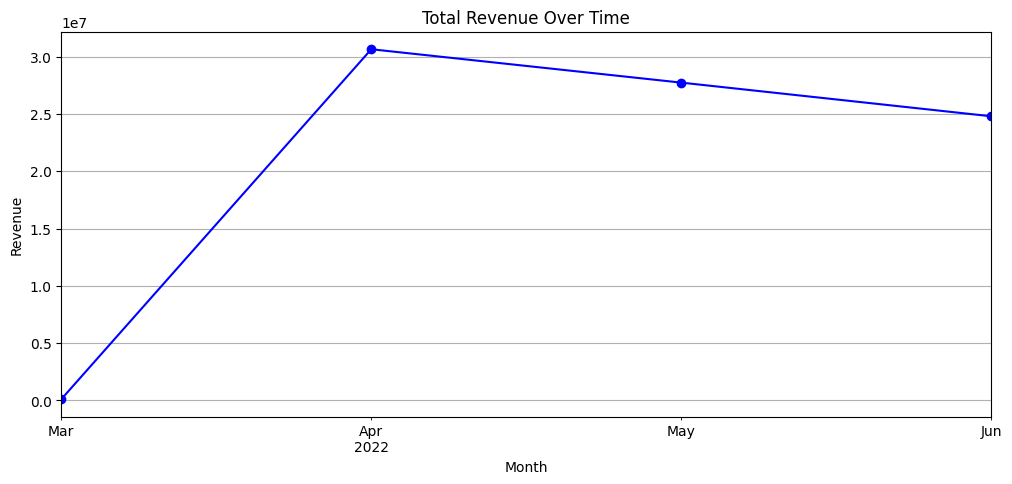

In [278]:
plt.figure(figsize=(12, 5))
df.resample('ME', on='Date')['Amount'].sum().plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

**Top 10 Performing Locations**

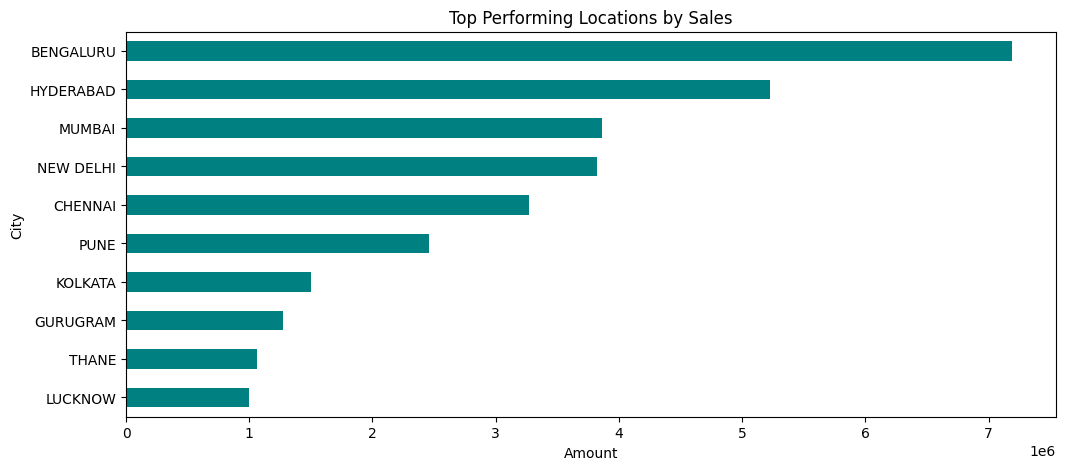

In [284]:
top_locations = df.groupby('City ')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_locations.sort_values().plot(kind='barh', color='teal')
plt.title('Top Performing Locations by Sales')
plt.xlabel('Amount')
plt.ylabel('City')
plt.show()

**Order Cancellation Rate**

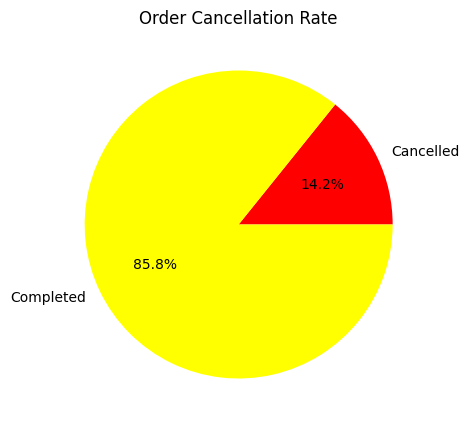

In [286]:
plt.figure(figsize=(5, 5))
plt.pie([cancel_rate, 100 - cancel_rate], labels=['Cancelled', 'Completed'], autopct='%1.1f%%', colors=['red', 'yellow'])
plt.title('Order Cancellation Rate')
plt.show()

**Fulfillment Comparison**

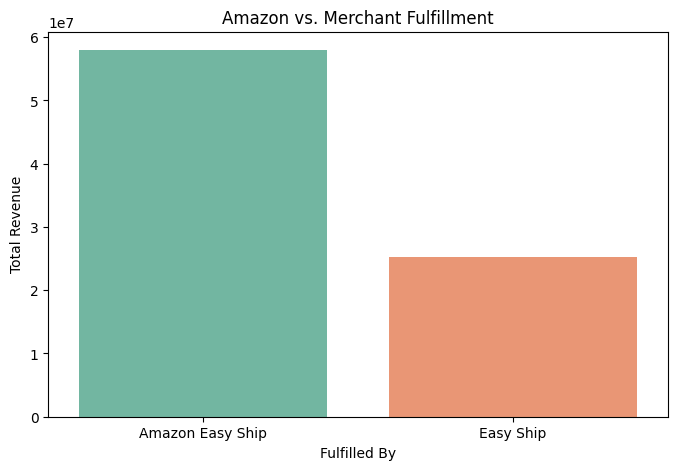

In [289]:
plt.figure(figsize=(8, 5))
sns.barplot(x=fulfillment_comparison.index, y=fulfillment_comparison.values, palette='Set2')
plt.title('Amazon vs. Merchant Fulfillment')
plt.ylabel('Total Revenue')
plt.xlabel('Fulfilled By')
plt.show()

**Order Status Breakdown**

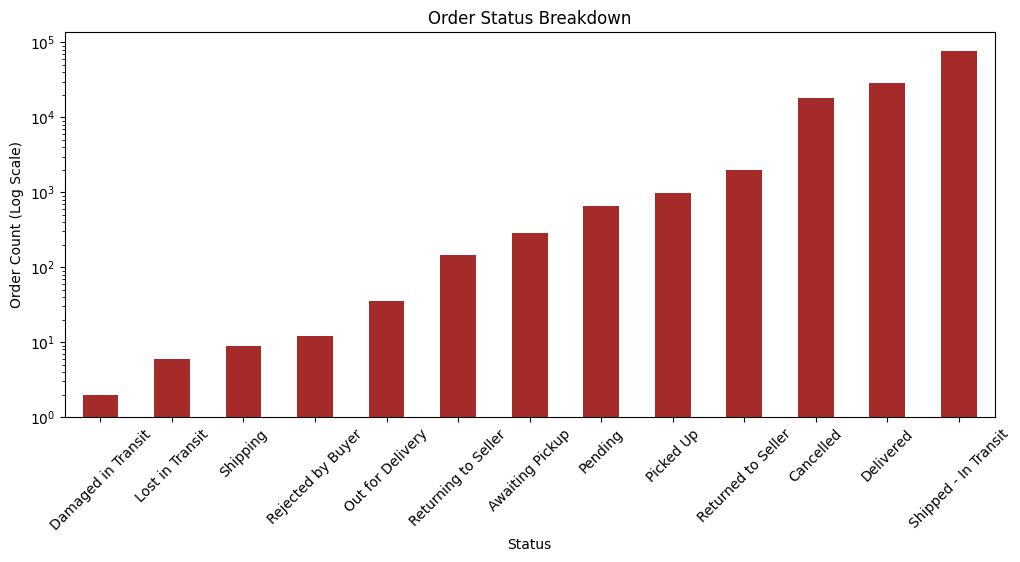

In [297]:
plt.figure(figsize=(12, 5))
order_status_counts.sort_values().plot(kind='bar', color='brown', log=True)
plt.title('Order Status Breakdown')
plt.xlabel('Status')
plt.ylabel('Order Count (Log Scale)')
plt.xticks(rotation=45)
plt.show()

**High-Demand Product Categories**

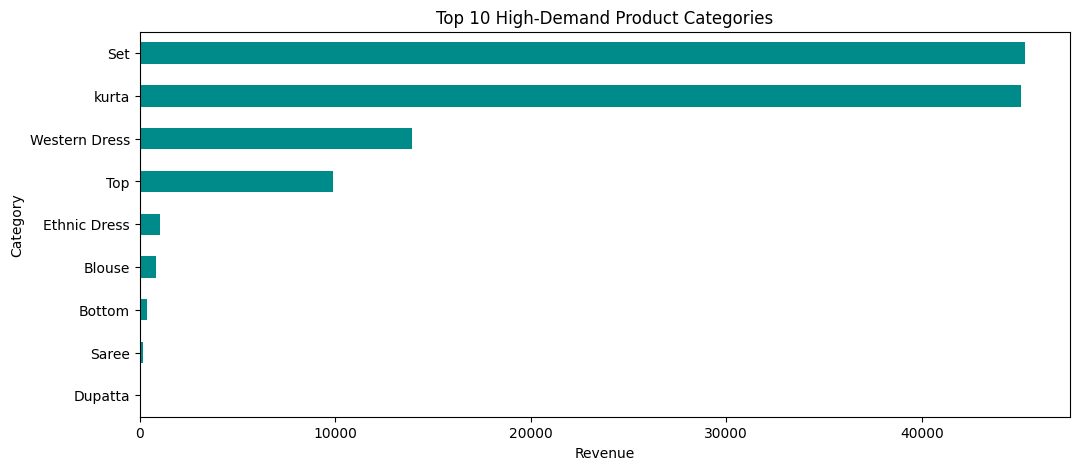

In [292]:
plt.figure(figsize=(12, 5))
top_categories.sort_values().plot(kind='barh', color='darkcyan')
plt.title('Top 10 High-Demand Product Categories')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()

**High Return & Cancellation Rates**

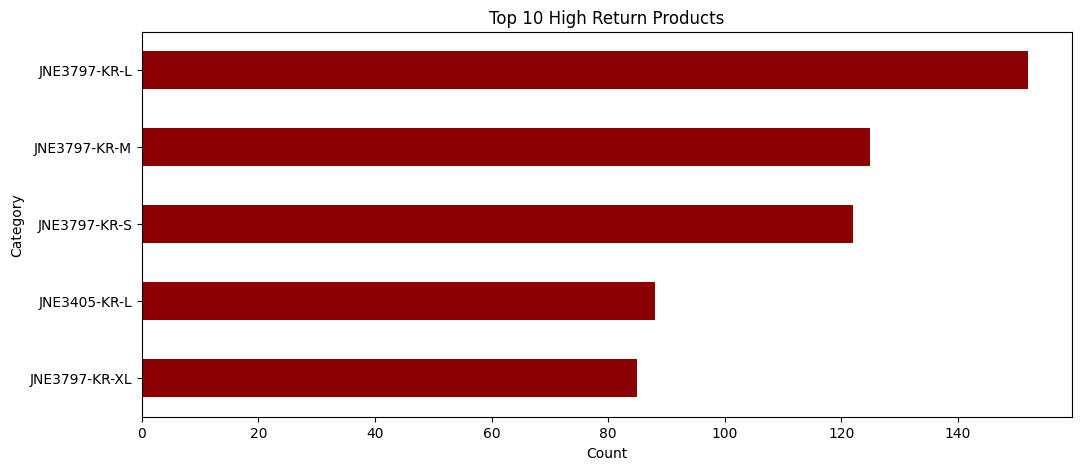

In [295]:
plt.figure(figsize=(12, 5))
return_rates.sort_values().plot(kind='barh', color='darkred')
plt.title('Top 10 High Return Products')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Problematic Categories**

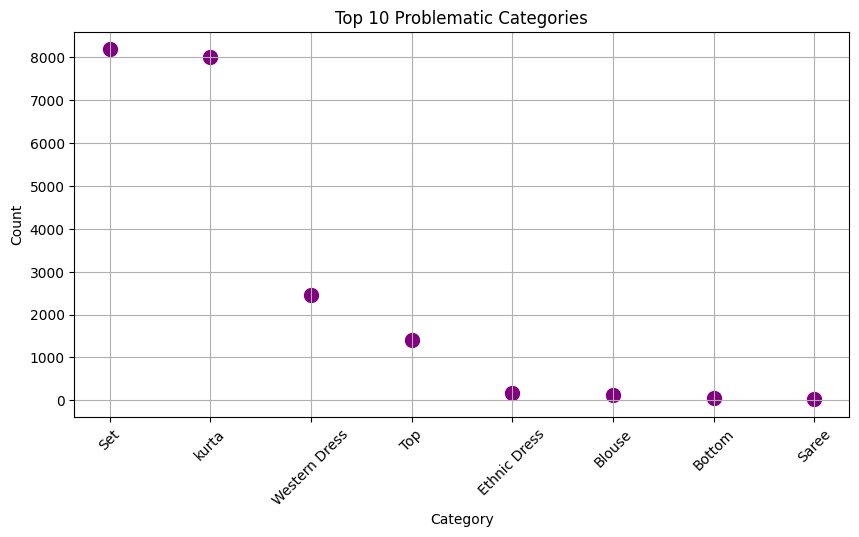

In [300]:
plt.figure(figsize=(10, 5))
plt.scatter(problematic_categories.index, problematic_categories.values, color='purple', s=100)
plt.title('Top 10 Problematic Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Conclusion & Recommendations

> Based on the analysis of order data, key insights have been derived that highlight the financial performance, customer behavior, logistics efficiency, product demand, and customer satisfaction trends.

**Top Performing Locations:**

> Major metro cities such as Bengaluru, Hyderabad, Mumbai, and New Delhi drive the highest sales.

> The concentration of sales in these cities suggests a need for optimized logistics and inventory allocation.

**Order Cancellation Trends:**

> The overall order cancellation rate is 14.22%, which indicates potential inefficiencies in order processing or changes in customer demand.

> High cancellations may result from delayed shipping, inventory stockouts, or customer dissatisfaction.

**B2B vs. B2C Performance:**

> B2C orders contribute significantly more revenue, but B2B orders have a higher average order value (AOV) (B2B AOV = 698.23 vs. B2C AOV = 645.56).

> B2B transactions should be targeted with bulk order discounts or personalized business offerings.

**Fulfillment Performance:**

> Amazon Easy Ship processes approximately 70% of the orders, while Merchant Easy Ship handles 30%.

> Further analysis is required to assess which fulfillment method offers better delivery speed and customer satisfaction.

**Order Status Breakdown:**

> 77,763 orders are still in transit, suggesting possible delivery delays.

> 18,338 orders were canceled, and 1,953 were returned to the seller, showing a need for better logistics planning.

**High-Demand Products & Inventory Management:**

> Categories like "Set" and "Kurta" have the highest demand, indicating strong customer preference.

> The average quantity ordered per transaction is 0.90, meaning most orders contain only one item.

> Proper stock replenishment strategies are needed to prevent stockouts for high-selling SKUs.

**Customer Satisfaction & Returns:**

> The SKUs JNE3797-KR-L, JNE3797-KR-M, and JNE3797-KR-S have the highest return and cancellation rates.

> Problematic categories include "Set," "Kurta," and "Western Dress," requiring quality control and better product descriptions.

**Best-Selling Products & Seasonal Trends:**

> SKU JNE3797-KR-L generated the highest revenue (₹555,436.75), followed by J0230-SKD-M and J0230-SKD-S.

> Seasonal demand patterns should be analyzed to optimize inventory and marketing strategies.

**Average Order Value (AOV):**

> The AOV is ₹692.01, suggesting an opportunity to implement cross-selling and upselling strategies.

# Additional Insights

**Optimize Order Fulfillment & Reduce Cancellations:**
> Focus on improving logistics, reducing delays, and addressing common cancellation reasons.

**Enhance Inventory Planning:**
> Stock up on high-demand categories like Sets and Kurtas while addressing stockouts in top-selling SKUs.

**Address High Return Rates:**
> Investigate quality issues or customer dissatisfaction linked to frequently returned SKUs and problematic categories.

**Boost B2B Sales:**
> Given its higher AOV, targeted marketing and bulk purchase incentives can improve B2B sales further.

# Final Thoughts

> This analysis provided a deep dive into order trends, customer behavior, and logistics efficiency. By leveraging data-driven insights, the business can optimize operations, improve customer satisfaction, and boost overall profitability. Moving forward, continuous monitoring and adaptation to market trends will be key to sustaining growth and enhancing the e-commerce experience.